# Annotation template for community annotations

This jupyter notebook should serve as a help to annotate better in groups of people with the help of napari. But it can be also used by individuals to better keep an overview. 

__Assumption:__ You preprocessed your data (rescaling, normalization, cropping, tiling, ...) and are now working with tif-images

<img src="imgs/scheme.jpg" width="400"/>

## 1. Defining a folder and reading in an image in napari

In [81]:
from skimage.io import imread
import os
import napari
from os import listdir
from os.path import isfile, join
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [64]:
#read in tif-image
tif_folder = "data/1_preprocessed/"

In [65]:
#append directory and sort
def get_sorted_image_list(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f)) and f.endswith('tif')]
    return sorted(files)

In [66]:
file_list = get_sorted_image_list(tif_folder)
file_list

['data/1_preprocessed/tp7_channel1_rescaled(256x256x103).tif']

In [67]:
#create napari-viewer
viewer = napari.Viewer()

Choose an image from the tif-folder: 
- file_list[0] = first element in the file_list
- file_list[1] = second element in the file_list
- ...

In [68]:
img = imread(file_list[0])

In [70]:
#add image to napari
layer = viewer.add_image(img, colormap = 'cyan', blending = 'additive')

Now you can add a label layer in the viewer and annotate in napari as shown in the [blogpost](https://focalplane.biologists.com/2023/02/28/annotating-3d-images-in-napari/). All people annotate the same images, in that way we can balance the interpersonal differences between the annotations.

## Creating an annotation folder and annotations

In [71]:
annotation_folder = "data/2_annotations/NAME/"

In [72]:
#creating annotation folder
os.makedirs(annotation_folder, exist_ok=True)

## Here a domain expert can give insights how the annotation should look like so that everyone knows how to annotate

The show-function was taken and modified from [here](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/19_spatial_transforms/scaling.html).

In [79]:
reference_annotation = imread("data/2_annotations/manual_annotation_and_slice_interpolation.tif")

In [93]:
def show(img, reference_annotation):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    
    img_projection_x = cle.maximum_x_projection(img)
    img_projection_y = cle.maximum_y_projection(img)
    img_projection_z = cle.maximum_z_projection(img)

    ref_projection_x = cle.maximum_x_projection(reference_annotation)
    ref_projection_y = cle.maximum_y_projection(reference_annotation)
    ref_projection_z = cle.maximum_z_projection(reference_annotation)

    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    cle.imshow(img_projection_x, plot=axs[0,0], labels=False)
    cle.imshow(img_projection_y, plot=axs[0,1], labels=False)
    cle.imshow(img_projection_z, plot=axs[0,2], labels=False)
    cle.imshow(ref_projection_x, plot=axs[1,0], labels=True)
    cle.imshow(ref_projection_y, plot=axs[1,1], labels=True)
    cle.imshow(ref_projection_z, plot=axs[1,2], labels=True)
    plt.show()

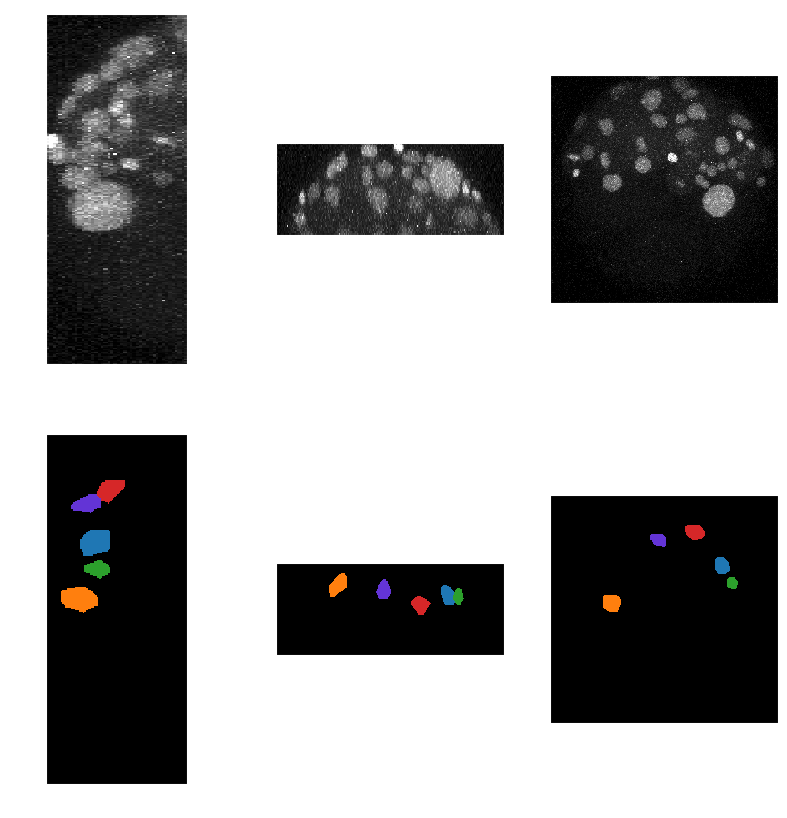

In [94]:
show(img, reference_annotation)

__Dataset:__

[Ozpolat, B. et al](https://doi.org/10.5281/zenodo.1063531) licensed [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/legalcode)
(single timepoint, single channel, rescaled)

## Saving the annotations

In [58]:
#now we say how we want to name the annotation file
filename = "image1"

Now delete every layer from the viewer except of the label layer.

In [60]:
viewer.layers.save(annotation_folder + filename)

['C:\\Users\\maral\\Documents\\GitHub\\3D annotation and segmentation quality assurance\\data\\2_annotations\\image1\\tmphd1nllsl\\Labels.tif',
 'C:\\Users\\maral\\Documents\\GitHub\\3D annotation and segmentation quality assurance\\data\\2_annotations\\image1\\tmphd1nllsl\\Image:0.tif']

Now you can also delete the label layer and open the next image.

In the end, document how you annotated the images.